Data Prepocesssing

In [1]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf 
import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [27]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = "../input/train/Train/"
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    
    samples = []
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        
    return np.array(samples)

def get_samples():
    df = pd.read_csv('../input/train.csv')
    return get_audios(), df['Class'].values

In [ ]:
X, Y = get_samples()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(f'Shape: {X_train.shape}')
print(f'Observation: \n{X_train[0]}')
print(f'Labels: {Y_train[:5]}')

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
print(cm)



Seeing audio features

C:\Users\lereb\AppData\Local\Temp\ipykernel_20628\2189494258.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('\\'.join((path,'T1.wav')), sr = 32000)
C:\Users\lereb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '..\\input\\Train\\C\\T1.wav'

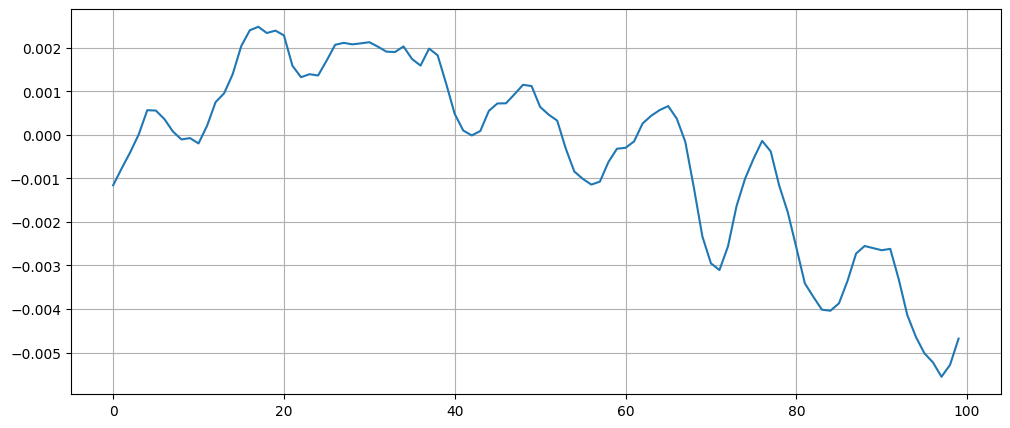

<Figure size 1200x500 with 0 Axes>

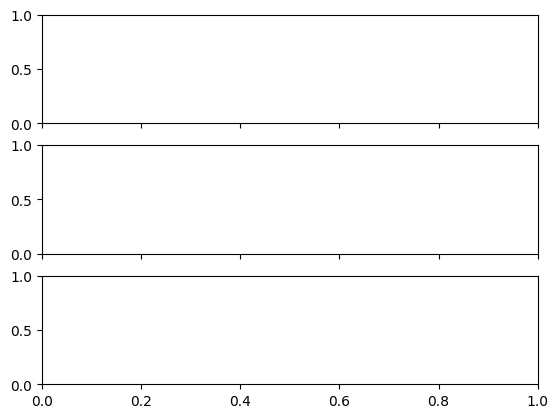

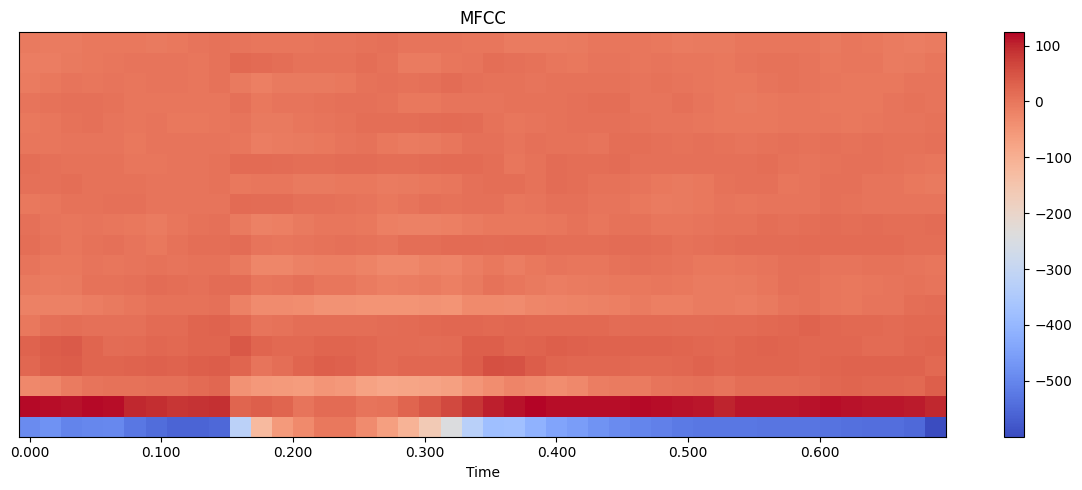

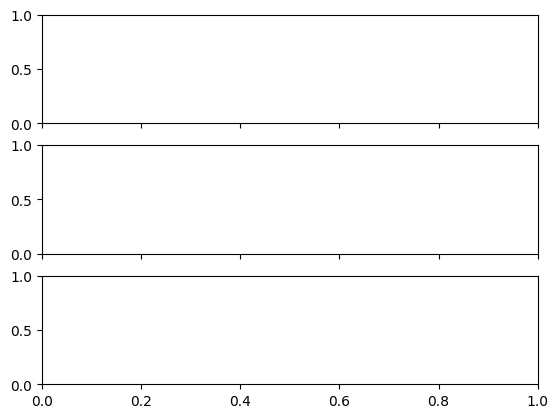

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [26]:
path = '..\\input\\Train\\C'
# for audio_file in os.listdir(path):
# 	y, sr = librosa.load('\\'.join((path,audio_file)), sr = 32000)
# 	librosa.display.waveshow(y[:int(sr*6.7)], max_points=11025, axis='s')

fig, ax = plt.subplots(nrows=3, sharex=True)
y, sr = librosa.load('\\'.join((path,'T1.wav')), sr = 32000)
y_harm, y_perc = librosa.effects.hpss(y)
# librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()
plt.show()

Number of crosses: 8


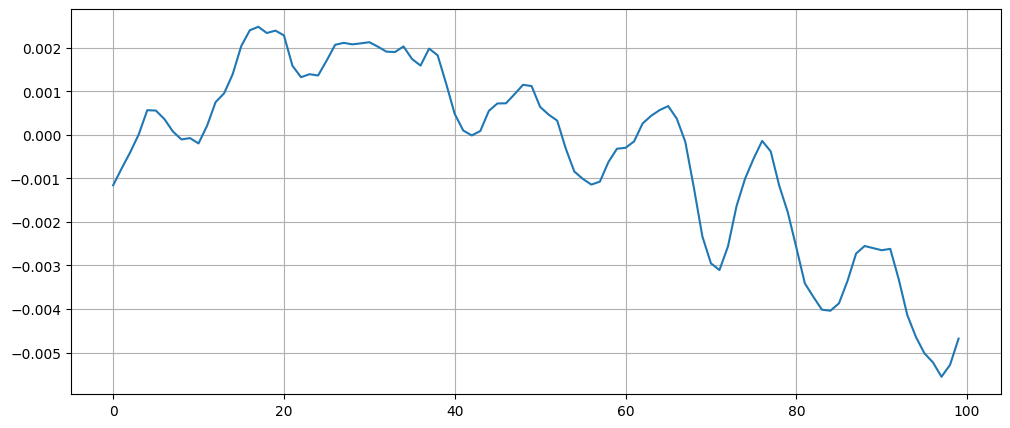

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(y[1000:1100]) # Zoom-in for seeing the example.
plt.grid()

n_crossings = librosa.zero_crossings(y[1000:1100], pad=False)
print(f'Number of crosses: {sum(n_crossings)}')


In [18]:
centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

print(f'Centroids Shape: {centroids.shape}')
print(f'First 3 centroids: {centroids[:3]}')

Centroids Shape: (44,)
First 3 centroids: [2307.01850536 2285.2994396  2204.52750554]


MFCCs Shape: (20, 44)
First mffcs: [-489.7922  -480.25436 -506.1692  -499.67926 -497.94135]


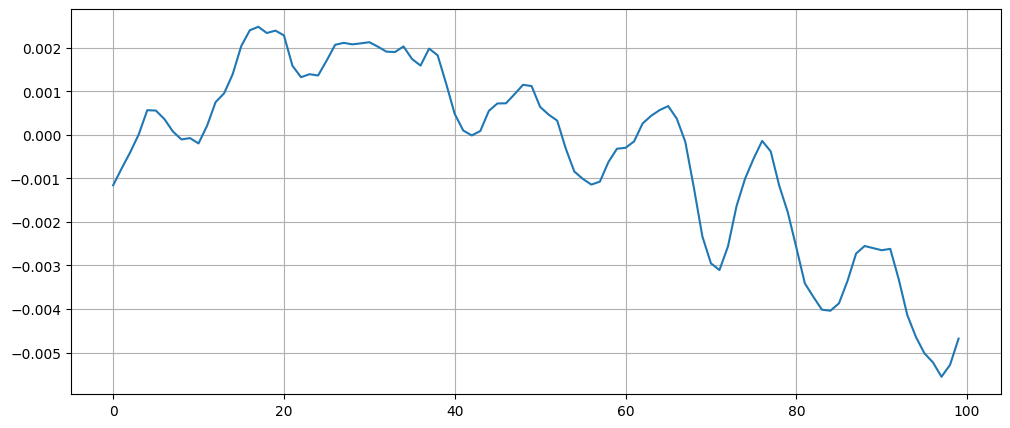

<Figure size 1200x500 with 0 Axes>

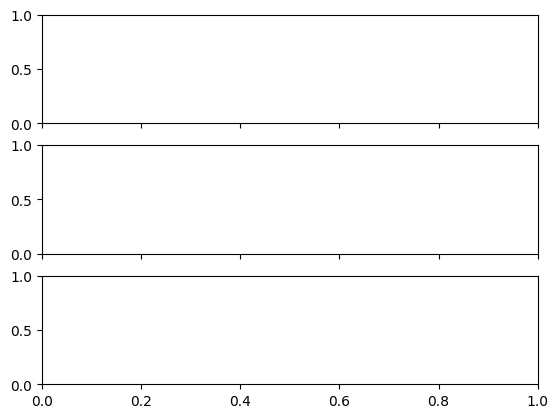

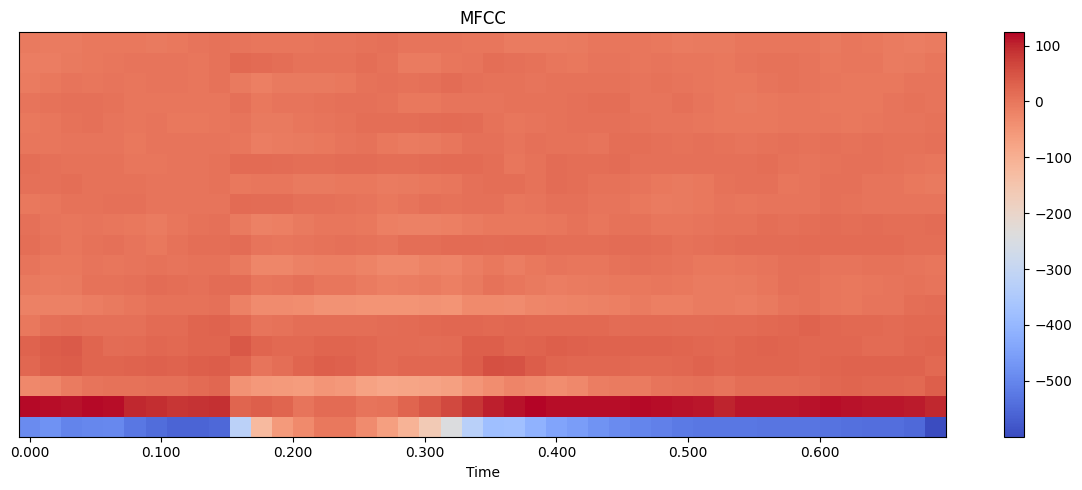

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [21]:
mfccs = librosa.feature.mfcc(y=y, sr=sr )

print(f'MFCCs Shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')

# Displaying  the MFCCs:
# plt.figure(figsize=(12, 5))
# librosa.display.specshow(mfccs, sr=sr, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

